In [1]:
import controlboros as cb
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

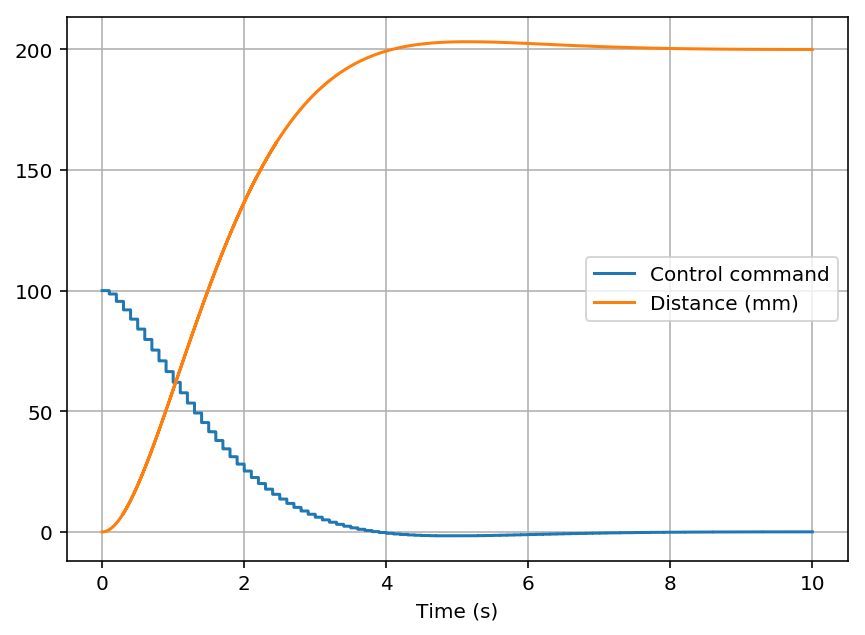

In [2]:
t_begin = 0.0
t_end = 10.0
real_dt = 1.0e-1
multiplier = 100
dt = real_dt/multiplier

cmd_max = 100.0

k_p = 0.50
k_d = 0.10


plant = cb.StateSpaceBuilder().from_tf([2.0], [1.0, 1.43, 0.0])\
                              .discretise(dt)\
                              .build()
ctrl = cb.StateSpace([[0.0]], [[1.0]], [[-k_d/real_dt]], [[k_p + k_d/real_dt]])
ctrl_wrapped = cb.RateWrapper(ctrl, multiplier)

t_cb = np.arange(t_begin, t_end, dt)

setpoint = np.array([200.0])  # Constant setpoint at 200 mm
feedback = np.array([0.0])  # Feedback value

cmd_cb = np.zeros((len(t_cb),))  # Controller command
y_cb = np.zeros((len(t_cb),))  # Array for the step response

# Reset the inital state of the systems
plant.set_state_to_zero()
ctrl_wrapped.set_state_to_zero()
ctrl_wrapped.reset_wrapper()
for i in range(len(t_cb)):
    cmd_raw = ctrl_wrapped.push_stateful(setpoint - feedback)
    cmd_cb[i] = np.clip(cmd_raw, -cmd_max, cmd_max)
    y_cb[i] = plant.push_stateful(cmd_cb[i:i + 1])
    feedback = y_cb[i]


plt.figure(figsize=(7, 5))
plt.step(t_cb, cmd_cb, where="post")
plt.step(t_cb, y_cb, where="post")
plt.xlabel("Time (s)")
plt.legend(["Control command", "Distance (mm)"])
plt.grid()
plt.show()